In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [3]:
df = pd.read_csv("BankNote_Authentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


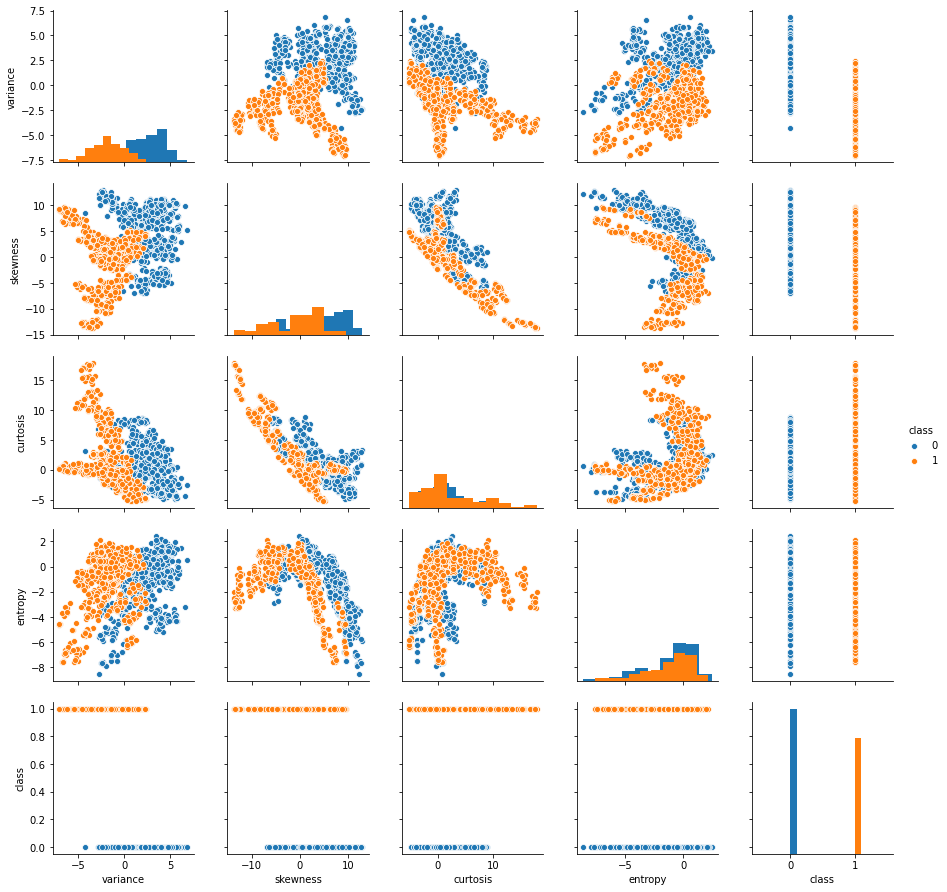

In [4]:
sn.pairplot(df, hue= "class", diag_kind="hist")

<AxesSubplot:xlabel='class', ylabel='count'>

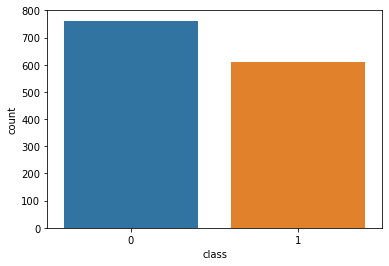

In [5]:
sn.countplot(df["class"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
x = df.iloc[:,0:4]
y = df.iloc[:,-1]


In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2)



In [11]:
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier()

classifier.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
yp = classifier.predict(x_test)
yp

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [14]:
cm = confusion_matrix(y_test,yp)

In [15]:
cm

array([[144,   2],
       [  0, 129]], dtype=int64)

In [16]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       146
           1       0.98      1.00      0.99       129

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [17]:
print(accuracy_score(y_test,yp))

0.9927272727272727


In [18]:
classifier.predict([[1,2,-3,4]])

array([1], dtype=int64)

In [19]:
import pickle

file1 = open("classifier.pkl", 'wb')

pickle.dump(classifier, file1 )

file1.close()

In [20]:
df1 = pd.read_csv("TestFile.csv")
classifier.predict(df1)

array([0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
df1

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.80730,-0.44699
1,4.54590,8.16740,-2.45860,-1.46210
2,3.86600,-2.63830,1.92420,0.10645
3,3.45660,9.52280,-4.01120,-3.59440
4,-0.47465,-4.34960,1.99010,0.75170
5,1.05520,1.18570,-2.64110,0.11033
6,1.16440,3.80950,-4.94080,-4.09090
7,-4.47790,7.37080,-0.31218,-6.77540
8,-2.73380,0.45523,2.43910,0.21766
